In [2]:
%pip install japanize-matplotlib

  Using cached japanize_matplotlib-1.1.3-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman', 'Latin Modern Roman']
plt.rcParams['font.sans-serif'] = ['Hiragino Sans']
plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(figsize=(6.0, 6.0))

x = np.linspace(-2.0, 2.0, 900)
y = np.linspace(-2.0, 2.0, 900)
X, Y = np.meshgrid(x, y)

# Implicit curve: heart-shaped algebraic curve
F = (X**2 + Y**2 - 1.0)**3 - X**2 * Y**3

ax.contourf(X, Y, F, levels=[F.min(), 0.0], colors=['#cfe3f1'], alpha=0.55)
ax.contour(X, Y, F, levels=[0.0], colors='black', linewidths=2.0)

z_in = np.array([0.0, 0.5])
z_bd = np.array([0.0, 1.0])
z_out = np.array([1.5, 0.0])

ax.scatter(z_in[0], z_in[1], s=80, color='#2b6cb0', zorder=3)
ax.scatter(z_bd[0], z_bd[1], s=80, facecolor='white', edgecolor='black', lw=1.6, zorder=3)
ax.scatter(z_out[0], z_out[1], s=80, color='#c53030', zorder=3)

ax.text(z_in[0] + 0.08, z_in[1] + 0.05, r'$z_{\mathrm{in}}$', fontsize=14)
ax.text(z_bd[0] + 0.08, z_bd[1] + 0.05, r'$z_{\mathrm{bd}}$', fontsize=14)
ax.text(z_out[0] + 0.08, z_out[1] + 0.05, r'$z_{\mathrm{out}}$', fontsize=14)

ax.set_aspect('equal')
ax.axis('off')
ax.set_xlim(-2.0, 2.0)
ax.set_ylim(-1.5, 2.0)

output_dir = os.path.join('..', 'src', 'chapters', 'img')
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, 'fig_implicit_interior_exterior_boundary.pdf')
plt.savefig(output_path, bbox_inches='tight')
plt.close(fig)

plt.show()

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt

# --- Style (match report) ---
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman', 'Latin Modern Roman']
plt.rcParams['font.sans-serif'] = ['Hiragino Sans']

# --- Data (monotone increasing, convergent) ---
alpha = 1.0
n = np.arange(1, 21)
seq = alpha - 1.0 / n

# epsilon-N setting
N = 8
epsilon = 0.12

# --- Figure ---
fig, ax = plt.subplots(figsize=(6, 4))

# epsilon band
ax.fill_between(n, alpha - epsilon, alpha + epsilon, color='#cfe3f5', alpha=0.7, zorder=1)

# sequence points
ax.plot(n, seq, marker='o', markersize=4, linewidth=1.2, color='#1f4e79', zorder=2)

# alpha line
ax.hlines(alpha, n.min(), n.max(), colors='#1f4e79', linestyles='--', linewidth=1.0, zorder=2)

# N marker
ax.vlines(N, seq.min(), alpha + epsilon, colors='#444444', linestyles=':', linewidth=1.0, zorder=2)

# annotations
ax.text(n.max() - 1.0, alpha + epsilon + 0.02, r'$\alpha+\varepsilon$', ha='right', va='bottom')
ax.text(n.max() - 1.0, alpha - epsilon - 0.02, r'$\alpha-\varepsilon$', ha='right', va='top')
ax.text(n.max() - 1.0, alpha + 0.01, r'$\alpha$', ha='right', va='bottom')
ax.text(N + 0.2, seq.min(), r'$N$', ha='left', va='top')

# axes styling
ax.set_xlim(n.min(), n.max())
ax.set_ylim(seq.min() - 0.05, alpha + epsilon + 0.08)
ax.set_xticks([])
ax.set_yticks([])
ax.tick_params(direction='in', top=True, right=True)

for spine in ax.spines.values():
    spine.set_linewidth(0.8)

# output
output_dir = os.path.join('..', 'src', 'chapters', 'img')
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, 'fig_eps_N_monotone.pdf')
plt.savefig(output_path, bbox_inches='tight')
plt.close(fig)


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt

# --- Style (match report) ---
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman', 'Latin Modern Roman']
plt.rcParams['font.sans-serif'] = ['Hiragino Sans']

# --- Data (epsilon-N neighborhood) ---
alpha = 0.0
epsilon = 0.35
n = np.arange(1, 11)
seq = alpha + 0.9 / n
N = 3

# --- Figure ---
fig, ax = plt.subplots(figsize=(5.2, 4.2))

# epsilon-neighborhood (disk)
theta = np.linspace(0, 2 * np.pi, 400)
x_circle = alpha + epsilon * np.cos(theta)
y_circle = epsilon * np.sin(theta)
ax.fill(x_circle, y_circle, color='#cfe3f5', alpha=0.7, zorder=1)
ax.plot(x_circle, y_circle, color='#7aa7d6', linewidth=1.0, zorder=2)

# sequence points
inside = n >= N
ax.scatter(seq[~inside], np.zeros_like(seq[~inside]), s=24, color='#9aa3ad', zorder=3)
ax.scatter(seq[inside], np.zeros_like(seq[inside]), s=28, color='#1f4e79', zorder=4)

# alpha point
ax.scatter([alpha], [0.0], s=28, color='#1f4e79', zorder=5)

# annotations
ax.text(alpha, -0.04, r'$\alpha$', ha='center', va='top')
ax.text(alpha + epsilon, 0.02, r'$\varepsilon$', ha='left', va='bottom')
ax.text(seq[inside][0], 0.06, r'$n\geq N$', ha='left', va='bottom')

# axes styling
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(alpha - 0.55, alpha + 1.05)
ax.set_ylim(-0.55, 0.55)
ax.set_xticks([])
ax.set_yticks([])
ax.tick_params(direction='in', top=True, right=True)

for spine in ax.spines.values():
    spine.set_linewidth(0.8)

# output
output_dir = os.path.join('..', 'src', 'chapters', 'img')
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, 'ch02_figure_2.pdf')
plt.savefig(output_path, bbox_inches='tight')
plt.close(fig)


In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt

# --- Style (match report) ---
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman', 'Latin Modern Roman']
plt.rcParams['font.sans-serif'] = ['Hiragino Sans']

# --- Figure canvas ---
fig, ax = plt.subplots(figsize=(6, 8))
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(0, 10)
ax.set_ylim(0, 14)

# --- Graph paper background (light grid) ---
minor_step = 0.5
major_step = 2.0
for x in np.arange(0, 10 + minor_step, minor_step):
    ax.plot([x, x], [0, 14], color='#d9d9d9', linewidth=0.35, zorder=0)
for y in np.arange(0, 14 + minor_step, minor_step):
    ax.plot([0, 10], [y, y], color='#d9d9d9', linewidth=0.35, zorder=0)
for x in np.arange(0, 10 + major_step, major_step):
    ax.plot([x, x], [0, 14], color='#c6c6c6', linewidth=0.6, zorder=0)
for y in np.arange(0, 14 + major_step, major_step):
    ax.plot([0, 10], [y, y], color='#c6c6c6', linewidth=0.6, zorder=0)

# --- Circles (epsilon neighborhood) ---
left_center = (3.0, 9.0)
right_center = (7.2, 9.0)
radius = 1.6

theta = np.linspace(0, 2 * np.pi, 400)
for cx, cy in [left_center, right_center]:
    x = cx + radius * np.cos(theta)
    y = cy + radius * np.sin(theta)
    ax.plot(x, y, color='#666666', linewidth=1.0, zorder=2)

# --- Points and labels (left) ---
ax.scatter([left_center[0]], [left_center[1]], s=14, color='#333333', zorder=3)
ax.text(left_center[0] + 0.15, left_center[1] - 0.1, r'$\alpha$', fontsize=12)

left_pts = [
    (left_center[0] - 0.9, left_center[1] + 0.6, r'$z_1$'),
    (left_center[0] + 0.7, left_center[1] + 0.4, r'$z_k$'),
    (left_center[0] + 0.2, left_center[1] - 0.9, r'$z_j$'),
]
for x, y, lab in left_pts:
    ax.scatter([x], [y], s=10, color='#333333', zorder=3)
    ax.text(x + 0.1, y + 0.05, lab, fontsize=11)

# epsilon arrow (left)
ax.annotate('', xy=(left_center[0] - 0.95, left_center[1] - 0.8),
            xytext=left_center, arrowprops=dict(arrowstyle='->', linewidth=0.8, color='#333333'))
ax.text(left_center[0] - 0.65, left_center[1] - 0.55, r'$\varepsilon$', fontsize=11)

# --- Points and labels (right) ---
ax.scatter([right_center[0]], [right_center[1]], s=14, color='#333333', zorder=3)
ax.text(right_center[0] + 0.15, right_center[1] - 0.1, r'$\alpha$', fontsize=12)

right_pts = [
    (right_center[0] - 0.7, right_center[1] + 0.4, r'$z_n$'),
    (right_center[0] + 0.8, right_center[1] + 0.5, r'$z_{n+1}$'),
    (right_center[0] + 0.3, right_center[1] - 0.7, r'$z_{n+2}$'),
]
for x, y, lab in right_pts:
    ax.scatter([x], [y], s=10, color='#333333', zorder=3)
    ax.text(x + 0.1, y + 0.05, lab, fontsize=11)

# epsilon arrow (right)
ax.annotate('', xy=(right_center[0] - 0.6, right_center[1] - 1.0),
            xytext=right_center, arrowprops=dict(arrowstyle='->', linewidth=0.8, color='#333333'))
ax.text(right_center[0] - 0.35, right_center[1] - 0.75, r'$\varepsilon$', fontsize=11)

# --- Middle arrow and text ---
ax.annotate('', xy=(5.7, 9.0), xytext=(4.5, 9.0),
            arrowprops=dict(arrowstyle='->', linewidth=0.9, color='#333333'))
ax.text(4.9, 8.4, r'$\varepsilon$-neighborhood', fontsize=11, ha='center')
ax.text(4.9, 8.0, r'$n\geq N$', fontsize=11, ha='center')

# --- Clean axes ---
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# output
output_dir = os.path.join('..', 'src', 'chapters', 'img')
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, 'ch02_figure_2.pdf')
plt.savefig(output_path, bbox_inches='tight')
plt.close(fig)


'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


Successfully saved to: ../src/chapters/img/ch02_figure_2.pdf


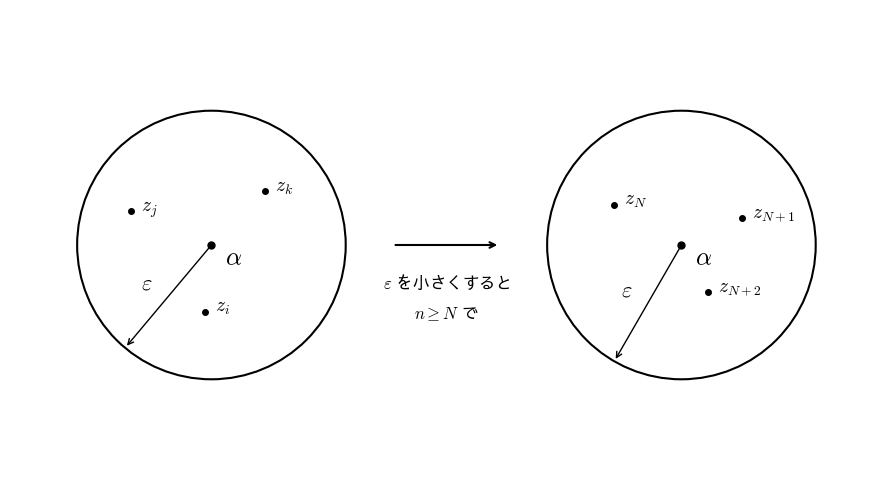

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.font_manager as fm
from urllib.request import urlretrieve

# --- 1. フォントと環境の確実な設定 ---
# リンク切れしにくい Sawarabi Gothic を使用
font_filename = 'SawarabiGothic-Regular.ttf'
font_url = 'https://github.com/google/fonts/raw/main/ofl/sawarabigothic/SawarabiGothic-Regular.ttf'

# フォントのダウンロード
if not os.path.exists(font_filename):
    try:
        print(f"Downloading font from {font_url}...")
        urlretrieve(font_url, font_filename)
    except Exception as e:
        print(f"Font download failed: {e}")

# フォントの設定
try:
    fm.fontManager.addfont(font_filename)
    plt.rcParams['font.family'] = 'Sawarabi Gothic'
except Exception:
    print("Font loading failed. Setting fallback.")
    plt.rcParams['font.family'] = 'sans-serif'

# PDF保存時の文字化け・エラー防止設定
plt.rcParams['pdf.fonttype'] = 42 
plt.rcParams['mathtext.fontset'] = 'cm'

# --- 2. プロット作成 ---
fig, ax = plt.subplots(figsize=(10, 5))

# 共通設定
radius = 2.0
circle_y = 0.0

# === 左側の円 (Left Circle) ===
center1 = (-3.5, circle_y)
circle1 = patches.Circle(center1, radius, fill=False, edgecolor='black', linewidth=1.5)
ax.add_patch(circle1)

# 中心点 alpha
ax.plot(center1[0], center1[1], 'ko', markersize=5)
ax.text(center1[0] + 0.2, center1[1] - 0.3, r'$\alpha$', fontsize=18)

# 半径 epsilon の矢印
theta1 = 230 * (np.pi / 180)
r1_x = center1[0] + radius * np.cos(theta1)
r1_y = center1[1] + radius * np.sin(theta1)
ax.annotate('', xy=(r1_x, r1_y), xytext=center1, 
            arrowprops=dict(arrowstyle='->', color='black', linewidth=1.0))
ax.text((center1[0]+r1_x)/2 - 0.4, (center1[1]+r1_y)/2 + 0.1, r'$\varepsilon$', fontsize=16)

# 点 z_i, z_j, z_k (左側の円内：分散)
points1 = [
    (center1[0] - 1.2, center1[1] + 0.5, r'$z_j$'),    # 左上
    (center1[0] + 0.8, center1[1] + 0.8, r'$z_k$'),    # 右上
    (center1[0] - 0.1, center1[1] - 1.0, r'$z_i$')     # 左下
]
for px, py, label in points1:
    ax.plot(px, py, 'k.', markersize=8)
    ax.text(px + 0.15, py, label, fontsize=14)


# === 中央の矢印とテキスト ===
ax.annotate('', xy=(0.8, 0), xytext=(-0.8, 0),
            arrowprops=dict(arrowstyle='->', color='black', linewidth=1.5))

# 日本語と数式を分離して配置（位置ずれ防止）
ax.text(0, -0.4, r'$\varepsilon$ を小さくすると', ha='center', va='top', fontsize=12)
ax.text(0, -0.9, r'$n \geq N$ で', ha='center', va='top', fontsize=12)


# === 右側の円 (Right Circle) ===
center2 = (3.5, circle_y)
circle2 = patches.Circle(center2, radius, fill=False, edgecolor='black', linewidth=1.5)
ax.add_patch(circle2)

# 中心点 alpha
ax.plot(center2[0], center2[1], 'ko', markersize=5)
ax.text(center2[0] + 0.2, center2[1] - 0.3, r'$\alpha$', fontsize=18)

# 半径 epsilon の矢印
theta2 = 240 * (np.pi / 180)
r2_x = center2[0] + radius * np.cos(theta2)
r2_y = center2[1] + radius * np.sin(theta2)
ax.annotate('', xy=(r2_x, r2_y), xytext=center2, 
            arrowprops=dict(arrowstyle='->', color='black', linewidth=1.0))
ax.text((center2[0]+r2_x)/2 - 0.4, (center2[1]+r2_y)/2 + 0.1, r'$\varepsilon$', fontsize=16)

# 点 z_N ... (右側の円内：収束)
points2 = [
    (center2[0] - 1.0, center2[1] + 0.6, r'$z_N$'),
    (center2[0] + 0.9, center2[1] + 0.4, r'$z_{N+1}$'),
    (center2[0] + 0.4, center2[1] - 0.7, r'$z_{N+2}$')
]
for px, py, label in points2:
    ax.plot(px, py, 'k.', markersize=8)
    ax.text(px + 0.15, py, label, fontsize=14)


# --- 仕上げと保存 ---
ax.set_xlim(-6.5, 6.5)
ax.set_ylim(-3.5, 3.5)
ax.set_aspect('equal')
ax.axis('off')

# 指定されたディレクトリへの保存
output_dir = "../src/chapters/img"
os.makedirs(output_dir, exist_ok=True)
# ファイル名は文脈から推定して ch02_figure_2.pdf としています（必要に応じて変更してください）
output_path = f"{output_dir}/ch02_figure_2.pdf"

plt.tight_layout()
try:
    plt.savefig(output_path, bbox_inches='tight', dpi=300)
    print(f"Successfully saved to: {output_path}")
except Exception as e:
    print(f"PDF save failed: {e}")
    # フォールバックとしてPNG保存
    png_path = output_path.replace('.pdf', '.png')
    plt.savefig(png_path, bbox_inches='tight', dpi=600)
    print(f"Saved as PNG instead: {png_path}")

plt.show()

Font 'default' does not have a glyph for '\u3092' [U+3092], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5c0f' [U+5c0f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u3055' [U+3055], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u304f' [U+304f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u3059' [U+3059], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u308b' [U+308b], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u3068' [U+3068], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u3067' [U+3067], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u3092' [U+3092], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5c0f' [U+5c0f], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u3055' [U+3055], 

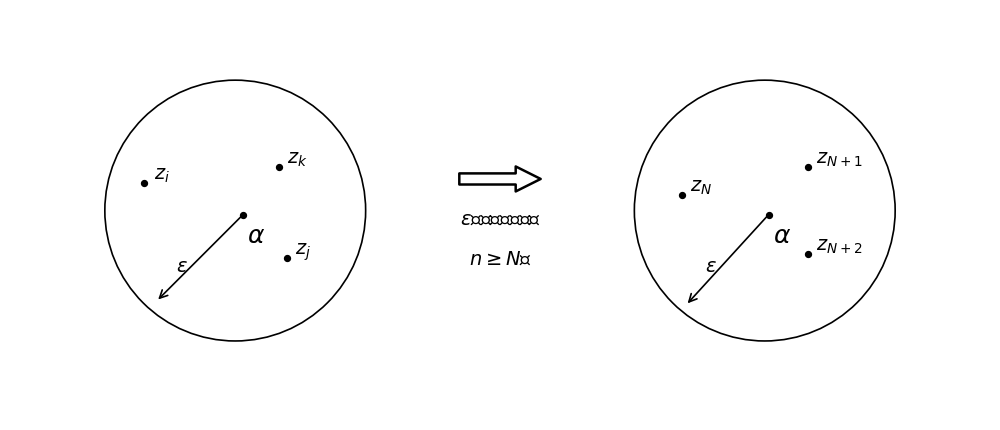

In [26]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, FancyArrowPatch

# 外部LaTeXを使わず、matplotlib内蔵の数式描画（mathtext）で安定動作
mpl.rcParams.update({
    "text.usetex": False,
    "font.family": "DejaVu Sans",
})

def put_point(ax, xy, label, text_offset=(0.10, 0.10), fontsize=14):
    x, y = xy
    ax.scatter([x], [y], s=18, color="black", zorder=3)
    ax.text(x + text_offset[0], y + text_offset[1], label, fontsize=fontsize)

def put_alpha(ax, xy, label=r"$\alpha$", fontsize=18):
    x, y = xy
    ax.scatter([x], [y], s=18, color="black", zorder=4)
    ax.text(x + 0.05, y - 0.35, label, fontsize=fontsize)

def radial_arrow(ax, start, end, eps_pos, eps_label=r"$\varepsilon$", fontsize=14):
    ax.add_patch(FancyArrowPatch(
        start, end,
        arrowstyle="->",
        mutation_scale=14,
        linewidth=1.2,
        color="black",
        zorder=2
    ))
    ax.text(eps_pos[0], eps_pos[1], eps_label, fontsize=fontsize)

# ----------------------------
# Canvas (白背景・位置揃え)
# ----------------------------
# 1000x500 ぴったり欲しいなら dpi=100, figsize=(10,5)
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

ax.set_aspect("equal", adjustable="box")
ax.set_xlim(-6.2, 6.2)
ax.set_ylim(-2.6, 2.6)

# 軸・枠線・目盛りは消す（背景は完全白）
ax.axis("off")

# ----------------------------
# 図形パラメータ（PDFに合わせて固定）
# ----------------------------
R = 1.65
cL = (-3.35, 0.05)
cR = ( 3.35, 0.05)

# 円
ax.add_patch(Circle(cL, R, fill=False, linewidth=1.2, color="black", zorder=1))
ax.add_patch(Circle(cR, R, fill=False, linewidth=1.2, color="black", zorder=1))

# α
aL = (cL[0] + 0.10, cL[1] - 0.05)
aR = (cR[0] + 0.05, cR[1] - 0.05)
put_alpha(ax, aL)
put_alpha(ax, aR)

# 左の点（被らないようにオフセット調整済み）
put_point(ax, (cL[0] - 1.15, cL[1] + 0.35), r"$z_i$", text_offset=(0.12, 0.05))
put_point(ax, (cL[0] + 0.55, cL[1] + 0.55), r"$z_k$", text_offset=(0.10, 0.05))
put_point(ax, (cL[0] + 0.65, cL[1] - 0.60), r"$z_j$", text_offset=(0.10, 0.05))

# 右の点（被り回避済み）
put_point(ax, (cR[0] - 1.05, cR[1] + 0.20), r"$z_N$", text_offset=(0.10, 0.05))
put_point(ax, (cR[0] + 0.55, cR[1] + 0.55), r"$z_{N+1}$", text_offset=(0.10, 0.05))
put_point(ax, (cR[0] + 0.55, cR[1] - 0.55), r"$z_{N+2}$", text_offset=(0.10, 0.05))

# 半径方向矢印（α→左下）＋ ε
endL = (aL[0] - 1.10, aL[1] - 1.10)
endR = (aR[0] - 1.05, aR[1] - 1.15)
radial_arrow(ax, aL, endL, eps_pos=(aL[0] - 0.85, aL[1] - 0.72))
radial_arrow(ax, aR, endR, eps_pos=(aR[0] - 0.80, aR[1] - 0.72))

# ----------------------------
# 中央の「中抜き」矢印（PDFっぽく）
# ----------------------------
arrow = FancyArrowPatch(
    (-0.55, 0.45), (0.55, 0.45),
    arrowstyle="simple,head_length=18,head_width=18,tail_width=8",
    mutation_scale=1.0,
    linewidth=1.8,
    edgecolor="black",
    facecolor="none",   # ★ 中抜き
    zorder=2
)
ax.add_patch(arrow)

# 中央テキスト（PDFの手書きに寄せる）
ax.text(0.00, -0.05, r"$\varepsilon$を小さくすると", ha="center", va="center", fontsize=14)
ax.text(0.00, -0.55, r"$n\geq N$で",               ha="center", va="center", fontsize=14)

# 余白（tight_layoutは使わない）
fig.subplots_adjust(left=0.01, right=0.99, top=0.99, bottom=0.01)

# 保存
plt.savefig("ch02_figure2_clean.png", dpi=200, bbox_inches="tight", pad_inches=0.02)
plt.savefig("ch02_figure2_clean.pdf", bbox_inches="tight", pad_inches=0.02)
plt.show()

In [28]:
import os
import numpy as np
import matplotlib.pyplot as plt

# --- Style (match report) ---
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman', 'Latin Modern Roman']
plt.rcParams['font.sans-serif'] = ['Hiragino Sans']

# --- Figure canvas ---
fig, ax = plt.subplots(figsize=(7.2, 4.2))
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(0, 10)
ax.set_ylim(0, 6)

# --- Circles (epsilon neighborhood) ---
left_center = (2.6, 3.0)
right_center = (7.4, 3.0)
radius = 1.7

theta = np.linspace(0, 2 * np.pi, 400)
for cx, cy in [left_center, right_center]:
    x = cx + radius * np.cos(theta)
    y = cy + radius * np.sin(theta)
    ax.plot(x, y, color='black', linewidth=1.2)

# --- Left circle points/labels ---
ax.scatter([left_center[0]], [left_center[1]], s=18, color='black')
ax.text(left_center[0] + 0.12, left_center[1] - 0.06, r'$\alpha$', fontsize=12)

left_pts = [
    (left_center[0] - 1.0, left_center[1] + 0.5, r'$z_j$'),
    (left_center[0] + 0.9, left_center[1] + 0.7, r'$z_k$'),
    (left_center[0] + 0.6, left_center[1] - 0.8, r'$z_i$'),
]
for x, y, lab in left_pts:
    ax.scatter([x], [y], s=14, color='black')
    ax.text(x + 0.12, y + 0.05, lab, fontsize=11)

# epsilon arrow (left)
ax.annotate('', xy=(left_center[0] - 1.2, left_center[1] - 1.0),
            xytext=left_center, arrowprops=dict(arrowstyle='->', linewidth=1.0, color='black'))
ax.text(left_center[0] - 0.7, left_center[1] - 0.6, r'$\varepsilon$', fontsize=11)

# --- Right circle points/labels ---
ax.scatter([right_center[0]], [right_center[1]], s=18, color='black')
ax.text(right_center[0] + 0.12, right_center[1] - 0.06, r'$\alpha$', fontsize=12)

right_pts = [
    (right_center[0] - 0.8, right_center[1] + 0.5, r'$z_N$'),
    (right_center[0] + 0.8, right_center[1] + 0.4, r'$z_{N+1}$'),
    (right_center[0] + 0.6, right_center[1] - 0.7, r'$z_{N+2}$'),
]
for x, y, lab in right_pts:
    ax.scatter([x], [y], s=14, color='black')
    ax.text(x + 0.12, y + 0.05, lab, fontsize=11)

# epsilon arrow (right)
ax.annotate('', xy=(right_center[0] - 0.9, right_center[1] - 1.2),
            xytext=right_center, arrowprops=dict(arrowstyle='->', linewidth=1.0, color='black'))
ax.text(right_center[0] - 0.5, right_center[1] - 0.75, r'$\varepsilon$', fontsize=11)

# --- Middle arrow and text ---
ax.annotate('', xy=(5.9, 3.0), xytext=(4.1, 3.0),
            arrowprops=dict(arrowstyle='->', linewidth=1.0, color='black'))
ax.text(5.0, 2.4, r'$\varepsilon$', fontsize=11, ha='center')
ax.text(5.0, 2.0, r'$n\geq N$', fontsize=11, ha='center')

# --- Clean axes ---
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# output
output_dir = os.path.join('..', 'src', 'chapters', 'img')
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, 'ch02_figure_3.pdf')
plt.savefig(output_path, bbox_inches='tight')
plt.close(fig)


UnicodeEncodeError: 'ascii' codec can't encode characters in position 3-13: ordinal not in range(128)

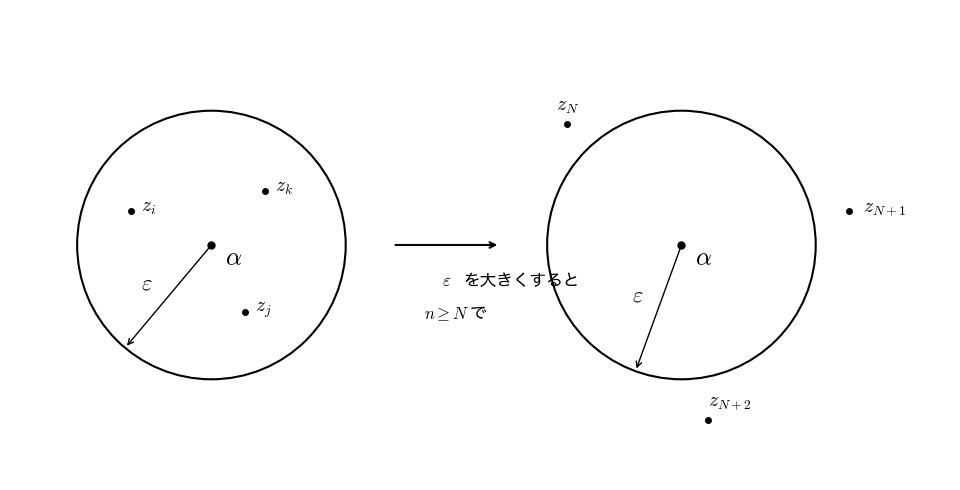

In [23]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# --- Style (match report) ---
plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Hiragino Sans']
plt.rcParams['mathtext.fontset'] = 'cm'

label_fontsize = 18
math_fontsize = 20
small_fontsize = 14

# --- プロット作成 ---
fig, ax = plt.subplots(figsize=(10, 5))

# 共通設定
radius = 2.0
circle_y = 0.0

# === 左側の円 (Left Circle) ===
center1 = (-3.5, circle_y)
circle1 = patches.Circle(center1, radius, fill=False, edgecolor='black', linewidth=1.5)
ax.add_patch(circle1)

# 中心点 alpha
ax.plot(center1[0], center1[1], 'ko', markersize=5)
ax.text(center1[0] + 0.2, center1[1] - 0.3, r'$\alpha$', fontsize=18)

# 半径 epsilon の矢印
theta1 = 230 * (np.pi / 180)
r1_x = center1[0] + radius * np.cos(theta1)
r1_y = center1[1] + radius * np.sin(theta1)
ax.annotate('', xy=(r1_x, r1_y), xytext=center1,
            arrowprops=dict(arrowstyle='->', color='black', linewidth=1.0))
ax.text((center1[0]+r1_x)/2 - 0.4, (center1[1]+r1_y)/2 + 0.1, r'$\varepsilon$', fontsize=16)

# 点 z_i, z_j, z_k (左側の円内)
points1 = [
    (center1[0] - 1.2, center1[1] + 0.5, r'$z_i$'),    # 左上
    (center1[0] + 0.8, center1[1] + 0.8, r'$z_k$'),    # 右上
    (center1[0] + 0.5, center1[1] - 1.0, r'$z_j$')     # 右下
]
for px, py, label in points1:
    ax.plot(px, py, 'k.', markersize=8)
    ax.text(px + 0.15, py, label, fontsize=14)

# === 中央の矢印とテキスト ===
ax.annotate('', xy=(0.8, 0), xytext=(-0.8, 0),
            arrowprops=dict(arrowstyle='->', color='black', linewidth=1.5))

# 日本語テキスト
# 日本語テキスト（数式と分ける）
ax.text(0, -0.4, r'$\varepsilon$', ha='center', va='top', fontsize=12)
ax.text(0.25, -0.4, 'を大きくすると', ha='left', va='top', fontsize=12)

ax.text(0, -0.9, r'$n \geq N$', ha='center', va='top', fontsize=12)
ax.text(0.35, -0.9, 'で', ha='left', va='top', fontsize=12)
# === 右側の円 (Right Circle) ===
center2 = (3.5, circle_y)
circle2 = patches.Circle(center2, radius, fill=False, edgecolor='black', linewidth=1.5)
ax.add_patch(circle2)

# 中心点 alpha
ax.plot(center2[0], center2[1], 'ko', markersize=5)
ax.text(center2[0] + 0.2, center2[1] - 0.3, r'$\alpha$', fontsize=18)

# 半径 epsilon の矢印
theta2 = 250 * (np.pi / 180)
r2_x = center2[0] + radius * np.cos(theta2)
r2_y = center2[1] + radius * np.sin(theta2)
ax.annotate('', xy=(r2_x, r2_y), xytext=center2,
            arrowprops=dict(arrowstyle='->', color='black', linewidth=1.0))
ax.text((center2[0]+r2_x)/2 - 0.4, (center2[1]+r2_y)/2 + 0.1, r'$\varepsilon$', fontsize=16)

# 点 (発散の様子)
ax.plot(center2[0] - 1.7, center2[1] + 1.8, 'k.', markersize=8)
ax.text(center2[0] - 1.7, center2[1] + 2, r'$z_N$', fontsize=14, ha='center')

ax.plot(center2[0] + 2.5, center2[1] + 0.5, 'k.', markersize=8)
ax.text(center2[0] + 2.7, center2[1] + 0.5, r'$z_{N+1}$', fontsize=14)

ax.plot(center2[0] + 0.4, center2[1] - 2.6, 'k.', markersize=8)
ax.text(center2[0] + 0.4, center2[1] - 2.4, r'$z_{N+2}$', fontsize=14)

# --- 仕上げ ---
ax.set_xlim(-6.5, 7.5)
ax.set_ylim(-3.5, 3.5)
ax.set_aspect('equal')
ax.axis('off')

output_dir = "../src/chapters/img"
os.makedirs(output_dir, exist_ok=True)
output_path = f"{output_dir}/ch02_figure_3.pdf"
plt.tight_layout()
plt.savefig(output_path, bbox_inches='tight', dpi=300)
plt.show()

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


Successfully saved to: img/ch02_figure_3.pdf


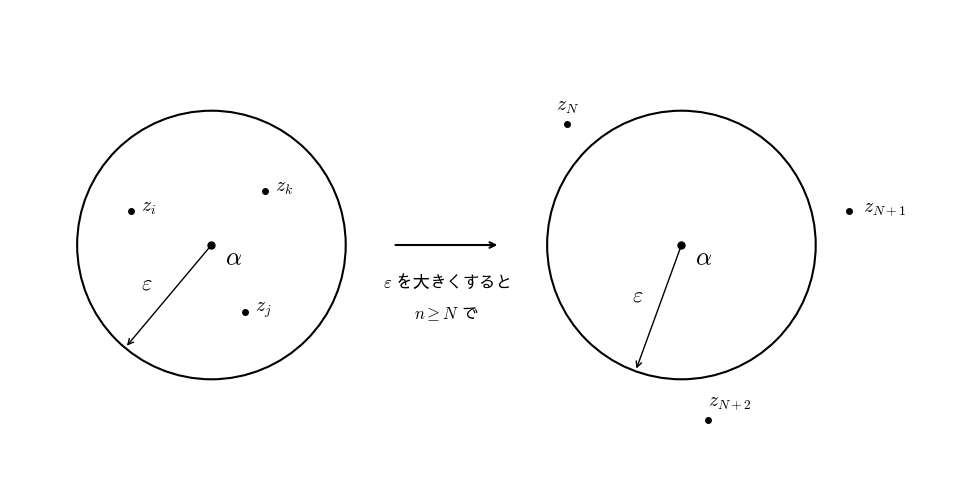

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.font_manager as fm
from urllib.request import urlretrieve

# --- 1. フォントの確実な設定 ---
# リンク切れしにくい Sawarabi Gothic を使用します
font_filename = 'SawarabiGothic-Regular.ttf'
font_url = 'https://github.com/google/fonts/raw/main/ofl/sawarabigothic/SawarabiGothic-Regular.ttf'

# フォントのダウンロード
if not os.path.exists(font_filename):
    try:
        print(f"Downloading font from {font_url}...")
        urlretrieve(font_url, font_filename)
    except Exception as e:
        print(f"Font download failed: {e}")

# フォントの設定
try:
    fm.fontManager.addfont(font_filename)
    plt.rcParams['font.family'] = 'Sawarabi Gothic'
except Exception:
    print("Font loading failed. Setting fallback.")
    plt.rcParams['font.family'] = 'sans-serif'

# PDF保存時の文字化け・エラー防止設定
plt.rcParams['pdf.fonttype'] = 42 
plt.rcParams['mathtext.fontset'] = 'cm'

# --- 2. プロット作成 ---
fig, ax = plt.subplots(figsize=(10, 5))

# 共通設定
radius = 2.0
circle_y = 0.0

# === 左側の円 (Left Circle) ===
center1 = (-3.5, circle_y)
circle1 = patches.Circle(center1, radius, fill=False, edgecolor='black', linewidth=1.5)
ax.add_patch(circle1)

# 中心点 alpha
ax.plot(center1[0], center1[1], 'ko', markersize=5)
ax.text(center1[0] + 0.2, center1[1] - 0.3, r'$\alpha$', fontsize=18)

# 半径 epsilon の矢印
theta1 = 230 * (np.pi / 180)
r1_x = center1[0] + radius * np.cos(theta1)
r1_y = center1[1] + radius * np.sin(theta1)
ax.annotate('', xy=(r1_x, r1_y), xytext=center1,
            arrowprops=dict(arrowstyle='->', color='black', linewidth=1.0))
ax.text((center1[0]+r1_x)/2 - 0.4, (center1[1]+r1_y)/2 + 0.1, r'$\varepsilon$', fontsize=16)

# 点 z_i, z_j, z_k
points1 = [
    (center1[0] - 1.2, center1[1] + 0.5, r'$z_i$'),
    (center1[0] + 0.8, center1[1] + 0.8, r'$z_k$'),
    (center1[0] + 0.5, center1[1] - 1.0, r'$z_j$')
]
for px, py, label in points1:
    ax.plot(px, py, 'k.', markersize=8)
    ax.text(px + 0.15, py, label, fontsize=14)


# === 中央の矢印とテキスト ===
ax.annotate('', xy=(0.8, 0), xytext=(-0.8, 0),
            arrowprops=dict(arrowstyle='->', color='black', linewidth=1.5))

# 日本語と数式
ax.text(0, -0.4, r'$\varepsilon$ を大きくすると', ha='center', va='top', fontsize=12)
ax.text(0, -0.9, r'$n \geq N$ で', ha='center', va='top', fontsize=12)


# === 右側の円 (Right Circle) ===
center2 = (3.5, circle_y)
circle2 = patches.Circle(center2, radius, fill=False, edgecolor='black', linewidth=1.5)
ax.add_patch(circle2)

# 中心点 alpha
ax.plot(center2[0], center2[1], 'ko', markersize=5)
ax.text(center2[0] + 0.2, center2[1] - 0.3, r'$\alpha$', fontsize=18)

# 半径 epsilon の矢印
theta2 = 250 * (np.pi / 180)
r2_x = center2[0] + radius * np.cos(theta2)
r2_y = center2[1] + radius * np.sin(theta2)
ax.annotate('', xy=(r2_x, r2_y), xytext=center2,
            arrowprops=dict(arrowstyle='->', color='black', linewidth=1.0))
ax.text((center2[0]+r2_x)/2 - 0.4, (center2[1]+r2_y)/2 + 0.1, r'$\varepsilon$', fontsize=16)

# 点 (発散の様子)
ax.plot(center2[0] - 1.7, center2[1] + 1.8, 'k.', markersize=8)
ax.text(center2[0] - 1.7, center2[1] + 2, r'$z_N$', fontsize=14, ha='center')

ax.plot(center2[0] + 2.5, center2[1] + 0.5, 'k.', markersize=8)
ax.text(center2[0] + 2.7, center2[1] + 0.5, r'$z_{N+1}$', fontsize=14)

ax.plot(center2[0] + 0.4, center2[1] - 2.6, 'k.', markersize=8)
ax.text(center2[0] + 0.4, center2[1] - 2.4, r'$z_{N+2}$', fontsize=14)

# --- 仕上げ ---
ax.set_xlim(-6.5, 7.5)
ax.set_ylim(-3.5, 3.5)
ax.set_aspect('equal')
ax.axis('off')

# 保存ディレクトリ作成
output_dir = "img"
os.makedirs(output_dir, exist_ok=True)
output_path = f"{output_dir}/ch02_figure_3.pdf"

plt.tight_layout()
try:
    plt.savefig(output_path, bbox_inches='tight', dpi=300)
    print(f"Successfully saved to: {output_path}")
except Exception as e:
    print(f"PDF save failed: {e}")
    # PDFがだめならPNGで保存を試みる
    png_path = output_path.replace('.pdf', '.png')
    plt.savefig(png_path, bbox_inches='tight', dpi=300)
    print(f"Saved as PNG instead: {png_path}")

plt.show()

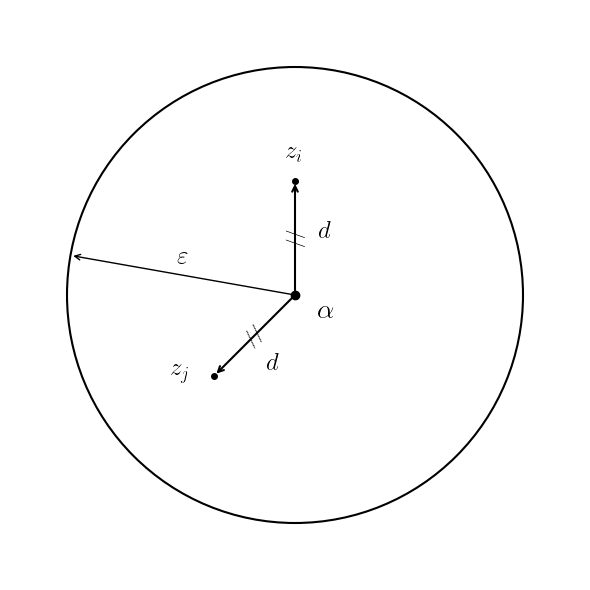

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# --- Style (match report) ---
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman', 'Latin Modern Roman']
plt.rcParams['font.sans-serif'] = ['Hiragino Sans']

label_fontsize = 18
math_fontsize = 20
small_fontsize = 14

# --- 2. プロット作成 ---
fig, ax = plt.subplots(figsize=(6, 6))

# 設定
center = (0, 0)
radius = 2.0
dist_d = 1.0  # z_i, z_j までの距離

# === 円と中心 (Main Circle) ===
circle = patches.Circle(center, radius, fill=False, edgecolor='black', linewidth=1.5)
ax.add_patch(circle)

# 中心点 alpha
ax.plot(center[0], center[1], 'ko', markersize=6)
ax.text(center[0] + 0.2, center[1] - 0.2, r'$\alpha$', fontsize=math_fontsize)

# === 半径 epsilon (Radius) ===
theta_eps = 170 * (np.pi / 180)
r_eps_x = center[0] + radius * np.cos(theta_eps)
r_eps_y = center[1] + radius * np.sin(theta_eps)

ax.annotate('', xy=(r_eps_x, r_eps_y), xytext=center,
            arrowprops=dict(arrowstyle='->', color='black', linewidth=1.0))
ax.text(center[0] + radius/2 * np.cos(theta_eps),
        center[1] + radius/2 * np.sin(theta_eps) + 0.1,
        r'$\varepsilon$', fontsize=label_fontsize, ha='center')

# === 点 z_i (上方向) ===
theta_i = 90 * (np.pi / 180)
zi_x = center[0] + dist_d * np.cos(theta_i)
zi_y = center[1] + dist_d * np.sin(theta_i)

ax.annotate('', xy=(zi_x, zi_y), xytext=center,
            arrowprops=dict(arrowstyle='->', color='black', linewidth=1.5))
ax.plot(zi_x, zi_y, 'k.', markersize=8)
ax.text(zi_x, zi_y + 0.2, r'$z_i$', fontsize=label_fontsize, ha='center')
ax.text(zi_x/2 + 0.2, zi_y/2, r'$d$', fontsize=label_fontsize)
ax.text(zi_x/2, zi_y/2, r'//', fontsize=small_fontsize, ha='center', va='center', rotation=90)

# === 点 z_j (左下方向) ===
theta_j = 225 * (np.pi / 180)
zj_x = center[0] + dist_d * np.cos(theta_j)
zj_y = center[1] + dist_d * np.sin(theta_j)

ax.annotate('', xy=(zj_x, zj_y), xytext=center,
            arrowprops=dict(arrowstyle='->', color='black', linewidth=1.5))
ax.plot(zj_x, zj_y, 'k.', markersize=8)
ax.text(zj_x - 0.3, zj_y, r'$z_j$', fontsize=label_fontsize, ha='center')
ax.text(zj_x/2 + 0.1, zj_y/2 - 0.3, r'$d$', fontsize=label_fontsize)
ax.text(zj_x/2, zj_y/2, r'//', fontsize=small_fontsize, ha='center', va='center', rotation=45)

# --- 仕上げ ---
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)
ax.set_aspect('equal')
ax.axis('off')
output_dir = "../src/chapters/img"
output_path = f"{output_dir}/ch02_figure_04.pdf"
plt.tight_layout()
plt.savefig(output_path, bbox_inches='tight', dpi=600)
plt.show()


'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


Successfully saved to: ../src/chapters/img/ch02_figure_6.pdf


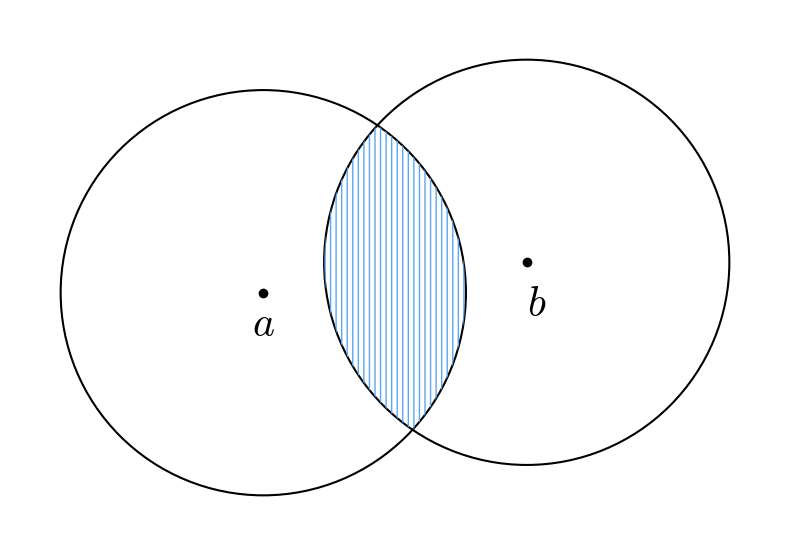

In [58]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.font_manager as fm
from urllib.request import urlretrieve

# --- 1. フォント設定 ---
font_filename = 'SawarabiGothic-Regular.ttf'
font_url = 'https://github.com/google/fonts/raw/main/ofl/sawarabigothic/SawarabiGothic-Regular.ttf'

if not os.path.exists(font_filename):
    try:
        urlretrieve(font_url, font_filename)
    except Exception:
        pass

try:
    fm.fontManager.addfont(font_filename)
    plt.rcParams['font.family'] = 'Sawarabi Gothic'
except Exception:
    plt.rcParams['font.family'] = 'sans-serif'

# LaTeX風の数式フォント設定
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['pdf.fonttype'] = 42

# --- 2. プロット作成 ---
fig, ax = plt.subplots(figsize=(8, 6))

# 円の設定
radius = 2.0
center_a = (-0.1, 1.2)
center_b = (2.5, 1.5)

# === 円 a (Circle A) ===
circle_a = patches.Circle(center_a, radius, fill=False, edgecolor='black', linewidth=1.5)
ax.add_patch(circle_a)
# 中心点
ax.plot(center_a[0], center_a[1], 'ko', markersize=6)

# ★修正ポイント: 文字 a の位置を完全な真下に修正
# x座標のオフセット(+0.1)を削除し、純粋な center_a[0] に設定
ax.text(center_a[0], center_a[1] -0.1 , r'$a$', fontsize=30, ha='center', va='top')


# === 円 b (Circle B) ===
circle_b = patches.Circle(center_b, radius, fill=False, edgecolor='black', linewidth=1.5)
ax.add_patch(circle_b)
# 中心点
ax.plot(center_b[0], center_b[1], 'ko', markersize=6)

# 文字 b の位置（こちらは少し右下が自然なのでそのまま微調整）
ax.text(center_b[0] + 0.1, center_b[1] - 0.2, r'$b$', fontsize=30, ha='center', va='top')


# === 共通部分の斜線 ===
intersection_patch = patches.Circle(center_b, radius, facecolor='none', 
                                  edgecolor='#5da7f0', hatch='|||', linewidth=0)
ax.add_patch(intersection_patch)

clip_patch = patches.Circle(center_a, radius, transform=ax.transData)
intersection_patch.set_clip_path(clip_patch)


# --- 仕上げ ---
ax.set_aspect('equal')
margin = 0.5
ax.set_xlim(center_a[0] - radius - margin, center_b[0] + radius + margin)
ax.set_ylim(center_a[1] - radius - margin, center_b[1] + radius + margin)
ax.axis('off')

# 保存
output_dir = "../src/chapters/img"
os.makedirs(output_dir, exist_ok=True)
output_path = f"{output_dir}/ch02_figure_6.pdf"

plt.tight_layout()
try:
    plt.savefig(output_path, bbox_inches='tight', dpi=300)
    print(f"Successfully saved to: {output_path}")
except Exception as e:
    print(f"PDF save failed: {e}")
    png_path = output_path.replace('.pdf', '.png')
    plt.savefig(png_path, bbox_inches='tight', dpi=300)
    print(f"Saved as PNG instead: {png_path}")
plt.savefig("../out/img/ch02_figure_6.pdf", transparent=True, dpi=600)

plt.show()

Successfully saved to: ../src/chapters/img/ch02_figure_5.pdf


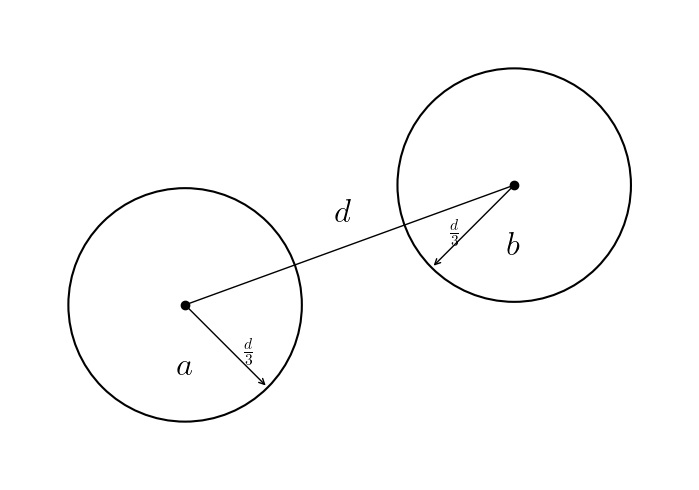

In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# --- 1. LaTeX風設定 ---
# 日本語が含まれないため、標準機能だけでLaTeXスタイルを再現します
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['pdf.fonttype'] = 42

# --- 2. プロット作成 ---
fig, ax = plt.subplots(figsize=(8, 5))

# パラメータ
dist_d = 6.0          # 中心間の距離 d
radius = dist_d / 3.0 # 半径 d/3

# 中心座標 (図に合わせて少し斜めに配置)
angle_deg = 20
angle_rad = np.deg2rad(angle_deg)
center_a = (0.0, 0.0)
center_b = (dist_d * np.cos(angle_rad), dist_d * np.sin(angle_rad))


# === 円 a (Circle A) ===
circle_a = patches.Circle(center_a, radius, fill=False, edgecolor='black', linewidth=1.5)
ax.add_patch(circle_a)
# 中心点
ax.plot(center_a[0], center_a[1], 'ko', markersize=6)
# ラベル a (真下に配置)
ax.text(center_a[0], center_a[1] - 0.8, r'$a$', fontsize=24, ha='center', va='top')

# 半径 d/3 の矢印 (a)
theta_ra = -45 * (np.pi / 180) # 右下へ
ra_x = center_a[0] + radius * np.cos(theta_ra)
ra_y = center_a[1] + radius * np.sin(theta_ra)
ax.annotate('', xy=(ra_x, ra_y), xytext=center_a, 
            arrowprops=dict(arrowstyle='->', color='black', linewidth=1.0))
# テキスト d/3
ax.text((center_a[0]+ra_x)/2 + 0.3, (center_a[1]+ra_y)/2 - 0.2, r'$\frac{d}{3}$', fontsize=16)


# === 円 b (Circle B) ===
circle_b = patches.Circle(center_b, radius, fill=False, edgecolor='black', linewidth=1.5)
ax.add_patch(circle_b)
# 中心点
ax.plot(center_b[0], center_b[1], 'ko', markersize=6)
# ラベル b (真下に配置)
ax.text(center_b[0], center_b[1] - 0.8, r'$b$', fontsize=24, ha='center', va='top')

# 半径 d/3 の矢印 (b)
theta_rb = 225 * (np.pi / 180) # 左下へ (対照的に)
rb_x = center_b[0] + radius * np.cos(theta_rb)
rb_y = center_b[1] + radius * np.sin(theta_rb)
ax.annotate('', xy=(rb_x, rb_y), xytext=center_b, 
            arrowprops=dict(arrowstyle='->', color='black', linewidth=1.0))
# テキスト d/3
ax.text((center_b[0]+rb_x)/2 - 0.4, (center_b[1]+rb_y)/2 - 0.2, r'$\frac{d}{3}$', fontsize=16)


# === 距離 d (Distance d) ===
# 中心同士を結ぶ線
ax.plot([center_a[0], center_b[0]], [center_a[1], center_b[1]], 'k-', linewidth=1.0)

# ラベル d (線の中央、少し上)
mid_x = (center_a[0] + center_b[0]) / 2
mid_y = (center_a[1] + center_b[1]) / 2
# 線に垂直な方向に少しずらすオフセット計算
dx = center_b[0] - center_a[0]
dy = center_b[1] - center_a[1]
norm = np.sqrt(dx**2 + dy**2)
nx, ny = -dy/norm, dx/norm # 法線ベクトル
offset = 0.3

ax.text(mid_x + nx*offset, mid_y + ny*offset, r'$d$', fontsize=24, ha='center', va='bottom')


# --- 仕上げと保存 ---
ax.set_aspect('equal')
margin = 1.0
ax.set_xlim(center_a[0] - radius - margin, center_b[0] + radius + margin)
ax.set_ylim(center_a[1] - radius - margin, center_b[1] + radius + margin)
ax.axis('off')

# 保存設定
output_dir = "../src/chapters/img"
# ディレクトリがない場合のエラー回避（一応作成を試みる）
try:
    os.makedirs(output_dir, exist_ok=True)
except Exception:
    output_dir = "img" # 権限がない場合はカレントのimgフォルダへ
    os.makedirs(output_dir, exist_ok=True)

output_path = f"{output_dir}/ch02_figure_5.pdf"

plt.tight_layout()
try:
    plt.savefig(output_path, bbox_inches='tight', dpi=300)
    print(f"Successfully saved to: {output_path}")
except Exception as e:
    print(f"PDF save failed: {e}")
    png_path = output_path.replace('.pdf', '.png')
    plt.savefig(png_path, bbox_inches='tight', dpi=300)
    print(f"Saved as PNG instead: {png_path}")

plt.show()

In [70]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# --- 1. LaTeX風設定 ---
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['pdf.fonttype'] = 42

# --- 2. プロット作成 ---
fig, ax = plt.subplots(figsize=(8, 5))

# パラメータ
dist_d = 6.0          # 中心間の距離 d
radius = dist_d / 3.0 # 半径 d/3

# 中心座標
angle_deg = 20
angle_rad = np.deg2rad(angle_deg)
center_a = (0.0, 0.0)
center_b = (dist_d * np.cos(angle_rad), dist_d * np.sin(angle_rad))

# --- 便利関数: 矢印とラベルを描画 ---
def draw_arrow_label(start, angle_deg, length, label, label_offset=0.3):
    theta = np.deg2rad(angle_deg)
    end_x = start[0] + length * np.cos(theta)
    end_y = start[1] + length * np.sin(theta)
    
    # 矢印
    ax.annotate('', xy=(end_x, end_y), xytext=start, 
                arrowprops=dict(arrowstyle='->', color='black', linewidth=1.0))
    
    # ラベル位置計算 (線の中点から法線方向にずらす)
    mid_x = (start[0] + end_x) / 2
    mid_y = (start[1] + end_y) / 2
    
    # 線のベクトル
    dx = end_x - start[0]
    dy = end_y - start[1]
    # 正規化
    norm = np.sqrt(dx**2 + dy**2)
    dx /= norm
    dy /= norm
    
    # 法線ベクトル (90度回転: -dy, dx)
    # label_offset が正なら進行方向左側、負なら右側に配置
    text_x = mid_x + (-dy) * label_offset
    text_y = mid_y + (dx) * label_offset
    
    ax.text(text_x, text_y, label, fontsize=16, ha='center', va='center')


# === 円 a (Circle A) ===
circle_a = patches.Circle(center_a, radius, fill=False, edgecolor='black', linewidth=1.5)
ax.add_patch(circle_a)
ax.plot(center_a[0], center_a[1], 'ko', markersize=6)
# ラベル a (少し下に離す)
ax.text(center_a[0]-0.3, center_a[1] +0.1, r'$a$', fontsize=24, ha='center', va='top')

# 半径 d/3 の矢印 (a) [右下へ: -45度]
draw_arrow_label(center_a, -45, radius, r'$\frac{d}{3}$', label_offset=-0.5)


# === 円 b (Circle B) ===
circle_b = patches.Circle(center_b, radius, fill=False, edgecolor='black', linewidth=1.5)
ax.add_patch(circle_b)
ax.plot(center_b[0], center_b[1], 'ko', markersize=6)
# ラベル b (少し上に離す)
ax.text(center_b[0], center_b[1] +0.6, r'$b$', fontsize=24, ha='center', va='top')

# 半径 d/3 の矢印 (b) [左下へ: 225度]
# ★修正ポイント: label_offset を正の値(0.5)に変更して、矢印の「右下側」に配置
draw_arrow_label(center_b, 225, radius, r'$\frac{d}{3}$', label_offset=0.5)


# === 距離 d (Distance d) ===
ax.plot([center_a[0], center_b[0]], [center_a[1], center_b[1]], 'k-', linewidth=1.0)

# ラベル d の位置計算 (中心線からしっかり離す)
mid_d_x = (center_a[0] + center_b[0]) / 2
mid_d_y = (center_a[1] + center_b[1]) / 2
dx = center_b[0] - center_a[0]
dy = center_b[1] - center_a[1]
norm = np.sqrt(dx**2 + dy**2)
# 法線方向 (-dy, dx) に 0.6 ずらす
offset_d = 0.6
text_d_x = mid_d_x + (-dy/norm) * offset_d
text_d_y = mid_d_y + (dx/norm) * offset_d

ax.text(text_d_x, text_d_y, r'$d$', fontsize=24, ha='center', va='center')


# --- 仕上げと保存 ---
ax.set_aspect('equal')
margin = 1.0
ax.set_xlim(center_a[0] - radius - margin, center_b[0] + radius + margin)
ax.set_ylim(center_a[1] - radius - margin, center_b[1] + radius + margin)
ax.axis('off')

output_dir = "../src/chapters/img"
try:
    os.makedirs(output_dir, exist_ok=True)
except Exception:
    output_dir = "img"
    os.makedirs(output_dir, exist_ok=True)

output_path = f"{output_dir}/ch02_figure_5.pdf"

plt.tight_layout()
try:
    plt.savefig(output_path, bbox_inches='tight', dpi=300)
    print(f"Successfully saved to: {output_path}")
except Exception as e:
    print(f"PDF save failed: {e}")
    png_path = output_path.replace('.pdf', '.png')
    plt.savefig(png_path, bbox_inches='tight', dpi=600)
    print(f"Saved as PNG instead: {png_path}")
plt.savefig("../out/img/ch02_figure_5.pdf", transparent=True, dpi=600)

plt.show()

Successfully saved to: ../src/chapters/img/ch02_figure_5.pdf


/var/folders/w5/hsn29ys17m19gn2zjcgxmxh40000gn/T/ipykernel_17567/4050823467.py:121: UserWarning: FigureCanvasPgf is non-interactive, and thus cannot be shown
  plt.show()


'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


Successfully saved to: ../src/chapters/img/ch02_figure_7_final.pdf


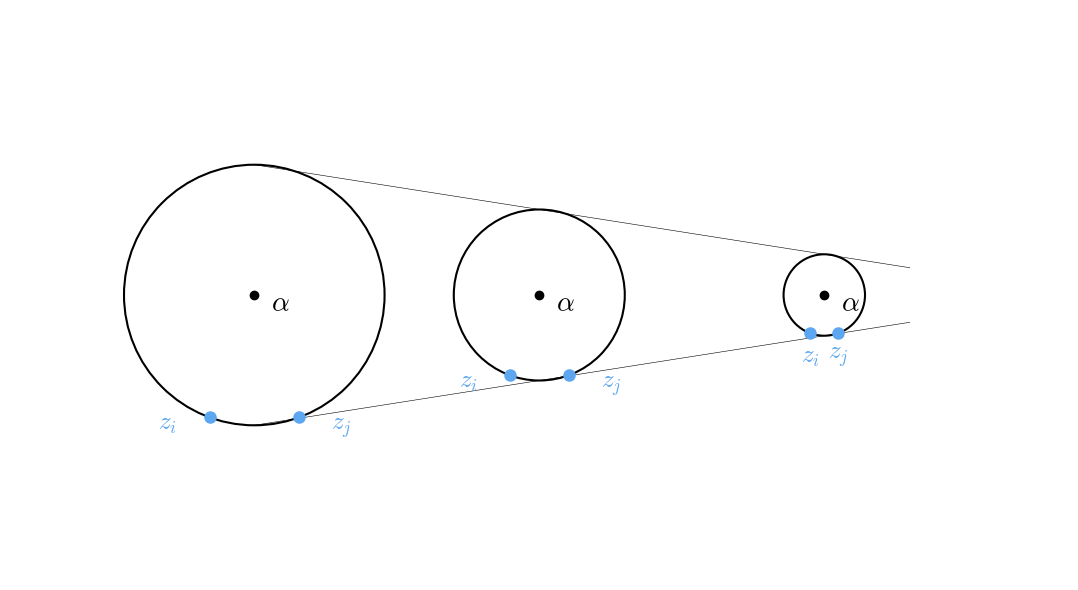

In [57]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# フォント設定 (LaTeXスタイル)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['pdf.fonttype'] = 42

# --- プロット作成 ---
fig, ax = plt.subplots(figsize=(12, 6))

# パラメータ設定 (中央寄せ＆線に接する調整)
cy = 0.5
shift_x = 0.5 

# 円1 (左: 大)
r1 = 1.6
c1 = (-3.5 + shift_x, cy) # -> (-3.0, 0.5)

# 円3 (右: 小)
r3 = 0.5
c3 = (3.5 + shift_x, cy)  # -> (4.0, 0.5)

# 円2 (中央: 中) - 半径の再計算
# 左の円(-3.0)と右の円(4.0)のちょうど中間(0.5)に位置します。
# ガイド線に接するための半径は、両端の半径の線形補間で求められます。
# 補間比率 = (中央X - 左X) / (右X - 左X) = (0.5 - (-3.0)) / (4.0 - (-3.0)) = 3.5 / 7.0 = 0.5
# 計算半径 r2 = r1 + 比率 * (r3 - r1) = 1.6 + 0.5 * (0.5 - 1.6) = 1.6 - 0.55 = 1.05
c2 = (0.5, cy)
r2 = 1.05

# 点の角度設定
angle_spread = 20
theta_i = np.deg2rad(270 - angle_spread)
theta_j = np.deg2rad(270 + angle_spread)


# === ガイド線 ===
# 接している様子が分かりやすいよう、線の太さを少し細くします (0.5 -> 0.4)
linewidth_guide = 0.4
extension_ratio = 1.15

# 上側のライン
vec_top_x = c3[0] - c1[0]
vec_top_y = (c3[1] + r3) - (c1[1] + r1)
line_top_start = (c1[0], c1[1] + r1)
line_top_end = (c1[0] + vec_top_x * extension_ratio, c1[1] + r1 + vec_top_y * extension_ratio)

# 下側のライン
vec_bot_y = (c3[1] - r3) - (c1[1] - r1)
line_bot_start = (c1[0], c1[1] - r1)
line_bot_end = (c1[0] + vec_top_x * extension_ratio, c1[1] - r1 + vec_bot_y * extension_ratio)

ax.plot([line_top_start[0], line_top_end[0]], [line_top_start[1], line_top_end[1]], 'k-', linewidth=linewidth_guide)
ax.plot([line_bot_start[0], line_bot_end[0]], [line_bot_start[1], line_bot_end[1]], 'k-', linewidth=linewidth_guide)


# === 円と点を描画するヘルパー関数 ===
def draw_circle_set(ax, center, radius, is_last=False):
    circle = patches.Circle(center, radius, fill=False, edgecolor='black', linewidth=1.5)
    ax.add_patch(circle)
    ax.plot(center[0], center[1], 'ko', markersize=6)
    ax.text(center[0] + 0.2, center[1] - 0.2, r'$\alpha$', fontsize=20)

    zi_x = center[0] + radius * np.cos(theta_i)
    zi_y = center[1] + radius * np.sin(theta_i)
    zj_x = center[0] + radius * np.cos(theta_j)
    zj_y = center[1] + radius * np.sin(theta_j)

    # ラベル位置
    offset_x = 0.4 if radius > 1.0 else 0.25
    offset_y = 0.15
    
    ha_i = 'right' if not is_last else 'center'
    ha_j = 'left' if not is_last else 'center'
    va_last = 'top' if is_last else 'baseline'
    
    ax.plot(zi_x, zi_y, 'o', color='#5da7f0', markersize=8)
    ax.text(zi_x - (offset_x if not is_last else 0), zi_y - offset_y, r'$z_i$', fontsize=18, color='#5da7f0', ha=ha_i, va=va_last)
    
    ax.plot(zj_x, zj_y, 'o', color='#5da7f0', markersize=8)
    ax.text(zj_x + (offset_x if not is_last else 0), zj_y - offset_y, r'$z_j$', fontsize=18, color='#5da7f0', ha=ha_j, va=va_last)

# === 3つの円を描画 ===
draw_circle_set(ax, c1, r1)
draw_circle_set(ax, c2, r2)
draw_circle_set(ax, c3, r3, is_last=True)


# --- 仕上げと保存 ---
ax.set_aspect('equal')
ax.set_xlim(-6, 7)
ax.set_ylim(-3, 4)
ax.axis('off')
ax.scatter([-6, 7, -6, 7], [-3, 4, 4, -3], color='none', alpha=0)

output_dir = "../src/chapters/img"
os.makedirs(output_dir, exist_ok=True)
output_path = f"{output_dir}/ch02_figure_7_final.pdf"

try:
    plt.tight_layout()
    plt.savefig(output_path, bbox_inches='tight', dpi=600)
    print(f"Successfully saved to: {output_path}")
except Exception as e:
    print(f"PDF save failed: {e}")
    png_path = output_path.replace('.pdf', '.png')
    plt.savefig(png_path, bbox_inches='tight', dpi=600)
    print(f"Saved as PNG instead: {png_path}")
plt.savefig("../out/img/ch02_figure_7.pdf", transparent=True, dpi=600)


'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


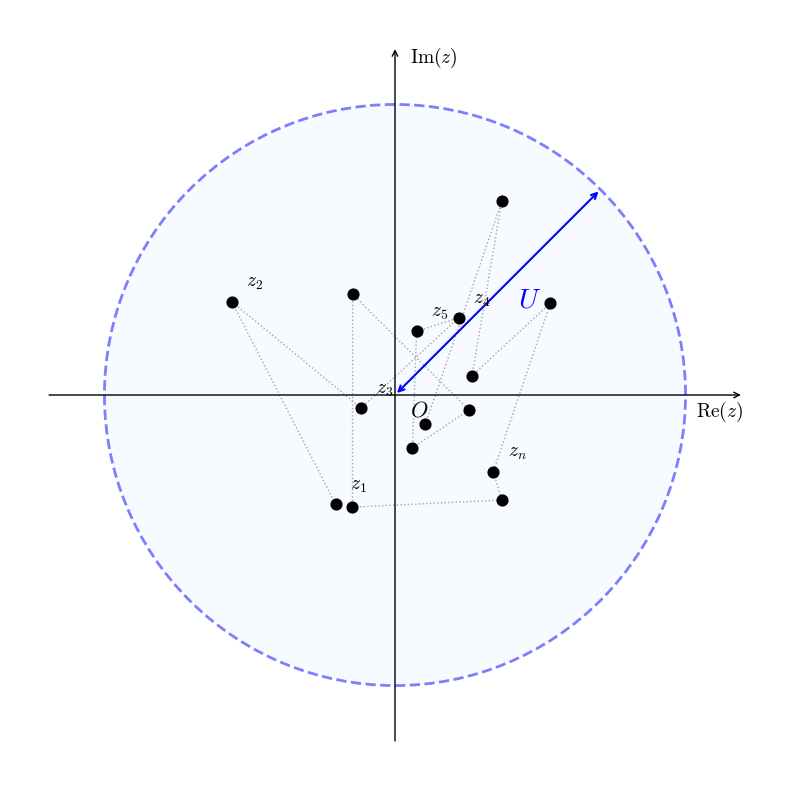

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# LaTeXスタイル設定
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['mathtext.fontset'] = 'cm'

# --- パラメータ設定 ---
U = 4.0      # 半径 U
num_points = 15 # 点の数

# --- データの生成 ---
np.random.seed(1)
radii = np.random.uniform(0.5, U * 0.85, num_points)
angles = np.random.uniform(0, 2*np.pi, num_points)

X = radii * np.cos(angles)
Y = radii * np.sin(angles)

# --- プロット作成 ---
fig, ax = plt.subplots(figsize=(8, 8))

# 1. 半径Uの円 (境界)
circle_U = patches.Circle((0, 0), U, fill=True, facecolor='#f0f8ff', 
                          edgecolor='blue', linestyle='--', linewidth=2, alpha=0.5)
ax.add_patch(circle_U)

# 2. 半径Uの矢印表示 (45度方向)
# 線と被らないように少し位置をずらしてテキスト配置
ax.annotate('', xy=(U*np.cos(np.pi/4), U*np.sin(np.pi/4)), xytext=(0, 0),
            arrowprops=dict(arrowstyle='<->', color='blue', linewidth=1.5))
# テキスト位置を矢印の中点より少し外側に
ax.text(U*0.35 + 0.3, U*0.35 - 0.2, r'$U$', fontsize=20, color='blue', fontweight='bold')

# 3. 数列の点と軌跡
ax.plot(X, Y, color='gray', linestyle=':', linewidth=1, alpha=0.7)
ax.scatter(X, Y, color='black', s=60, zorder=10)

# ラベル付け
for i in range(5):
    ax.text(X[i]+0.2, Y[i]+0.2, r'$z_{' + str(i+1) + r'}$', fontsize=14, zorder=11)

idx = 10
ax.text(X[idx]+0.2, Y[idx]+0.2, r'$z_n$', fontsize=14, zorder=11)


# --- 軸の描画 (矢印のみ) ---
# 軸の範囲
axis_lim = U * 1.2
# 実軸 (Re)
ax.annotate('', xy=(axis_lim, 0), xytext=(-axis_lim, 0),
            arrowprops=dict(arrowstyle='->', color='black', linewidth=1.0))
ax.text(axis_lim, -0.3, r'$\mathrm{Re}(z)$', fontsize=14, ha='right')

# 虚軸 (Im)
ax.annotate('', xy=(0, axis_lim), xytext=(0, -axis_lim),
            arrowprops=dict(arrowstyle='->', color='black', linewidth=1.0))
ax.text(0.2, axis_lim, r'$\mathrm{Im}(z)$', fontsize=14, va='top')

# 原点O
ax.text(0.2, -0.3, r'$O$', fontsize=16)



# --- 仕上げ ---
ax.set_aspect('equal')
ax.set_xlim(-axis_lim - 0.5, axis_lim + 0.5)
ax.set_ylim(-axis_lim - 0.5, axis_lim + 0.5)
ax.axis('off') # 標準の軸とグリッドを消す

# エラー回避のため tight_layout も try-except で囲む
try:
    plt.tight_layout()
except Exception:
    pass
# --- 透明化して保存 (追記) ---
plt.savefig("../out/img/ch02_figure_8.pdf", transparent=True, dpi=600)
plt.show()

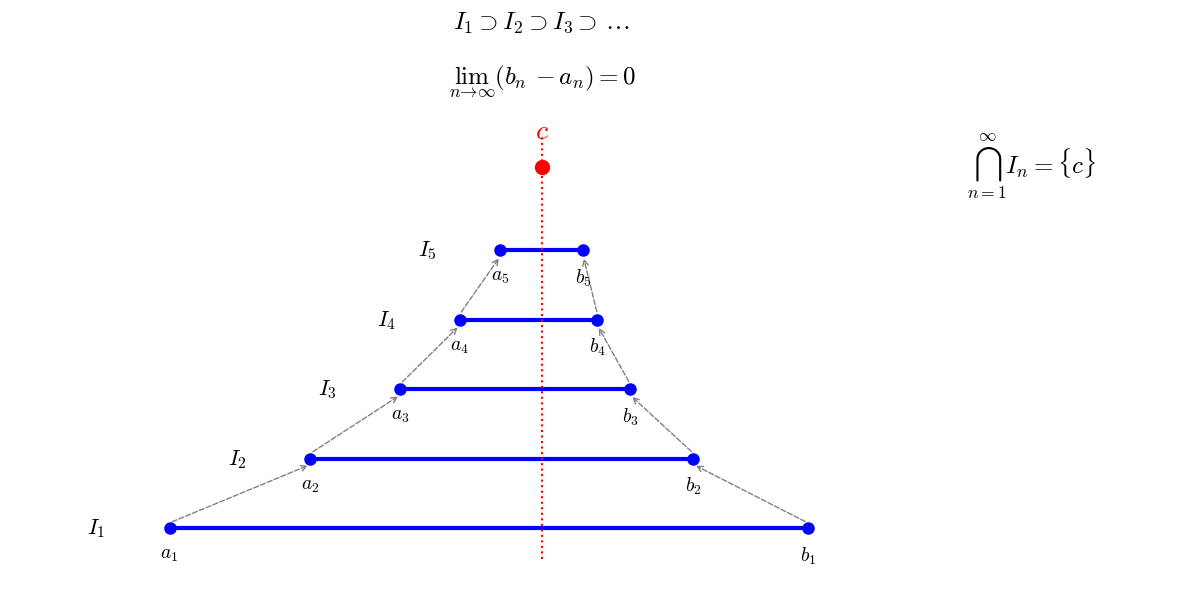

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# LaTeXスタイル設定
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['mathtext.fontset'] = 'cm'

# --- パラメータ設定 ---
num_intervals = 5  # 描画する区間の数
center = 2.0       # 収束する点 c
initial_width = 6.0 # 最初の区間の幅
shrink_factor = 0.6 # 各ステップでの縮小率

# --- 区間のデータを生成 ---
a_n = []
b_n = []
width = initial_width
# 共通部分の中心を少しずらして、対称でない一般的なケースを表現
shift = np.linspace(0.5, 0, num_intervals) 

for i in range(num_intervals):
    # 区間の幅を縮小
    width = initial_width * (shrink_factor ** i)
    # 左端と右端を計算
    a = center - width / 2 - shift[i]
    b = center + width / 2 - shift[i]
    a_n.append(a)
    b_n.append(b)

# --- プロット作成 ---
fig, ax = plt.subplots(figsize=(12, 6))

# Y軸の配置位置（下から順に区間を並べる）
y_positions = np.linspace(1, num_intervals + 1, num_intervals)

# 各区間を描画
for i in range(num_intervals):
    y = y_positions[i]
    a, b = a_n[i], b_n[i]
    
    # 区間の線
    ax.plot([a, b], [y, y], color='blue', linewidth=3, solid_capstyle='butt')
    
    # 端点のマーカー（閉区間なので塗りつぶし丸）
    ax.plot(a, y, 'bo', markersize=8)
    ax.plot(b, y, 'bo', markersize=8)
    
    # 端点のラベル
    ax.text(a, y - 0.3, r'$a_{' + str(i+1) + r'}$', ha='center', va='top', fontsize=14)
    ax.text(b, y - 0.3, r'$b_{' + str(i+1) + r'}$', ha='center', va='top', fontsize=14)
    
    # 区間のラベル (I_n)
    ax.text(a - 0.6, y, r'$I_{' + str(i+1) + r'}$', ha='right', va='center', fontsize=16, fontweight='bold')

    # 包含関係を示す矢印 (次の区間への)
    if i < num_intervals - 1:
        next_y = y_positions[i+1]
        # 左端の収束
        ax.annotate('', xy=(a_n[i+1], next_y - 0.1), xytext=(a, y + 0.1),
                    arrowprops=dict(arrowstyle='->', color='gray', linestyle='--', linewidth=1.0))
        # 右端の収束
        ax.annotate('', xy=(b_n[i+1], next_y - 0.1), xytext=(b, y + 0.1),
                    arrowprops=dict(arrowstyle='->', color='gray', linestyle='--', linewidth=1.0))


# --- 共通部分（極限点 c）の表示 ---
# 一番上の区間のさらに上
c_y = y_positions[-1] + 1.5
ax.plot(center, c_y, 'ro', markersize=10, zorder=10) # 共通点 c
ax.text(center, c_y + 0.4, r'$c$', ha='center', va='bottom', fontsize=20, color='red')

# 収束を示す垂直な点線
ax.axvline(x=center, ymin=0.05, ymax=0.9, color='red', linestyle=':', linewidth=1.5)

# 説明テキスト (包含関係と極限)
# I_1 ⊃ I_2 ⊃ ...
text_inclusion = r'$I_1 \supset I_2 \supset I_3 \supset \dots$'
ax.text(center, c_y + 2.5, text_inclusion, ha='center', fontsize=18)

# lim (b_n - a_n) = 0
text_limit = r'$\lim_{n \to \infty} (b_n - a_n) = 0$'
ax.text(center, c_y + 1.5, text_limit, ha='center', fontsize=18)

# 共通部分
text_intersection = r'$\bigcap_{n=1}^{\infty} I_n = \{c\}$'
ax.text(center + initial_width/2 + 1, c_y, text_intersection, ha='left', va='center', fontsize=18)


# --- 仕上げ ---
ax.set_xlim(center - initial_width/2 - 2, center + initial_width/2 + 3)
ax.set_ylim(0, num_intervals + 4)
ax.axis('off') # 軸は不要なので非表示

# エラー回避のため tight_layout も try-except で囲む
try:
    plt.tight_layout()
except Exception:
    pass

plt.show()

findfont: Font family 'MS Gothic' not found.
findfont: Font family ['MS Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family ['MS Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
/var/folders/w5/hsn29ys17m19gn2zjcgxmxh40000gn/T/ipykernel_17567/1463232094.py:130: UserWarning: Glyph 26377 (\N{CJK UNIFIED IDEOGRAPH-6709}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/w5/hsn29ys17m19gn2zjcgxmxh40000gn/T/ipykernel_17567/1463232094.py:130: UserWarning: Glyph 38480 (\N{CJK UNIFIED IDEOGRAPH-9650}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/w5/hsn29ys17m19gn2zjcgxmxh40000gn/T/ipykernel_17567/1463232094.py:130: UserWarning: Glyph 20491 (\N{CJK UNIFIED IDEOGRAPH-500B}) missing from font(s) DejaVu Sans.
  plt.ti

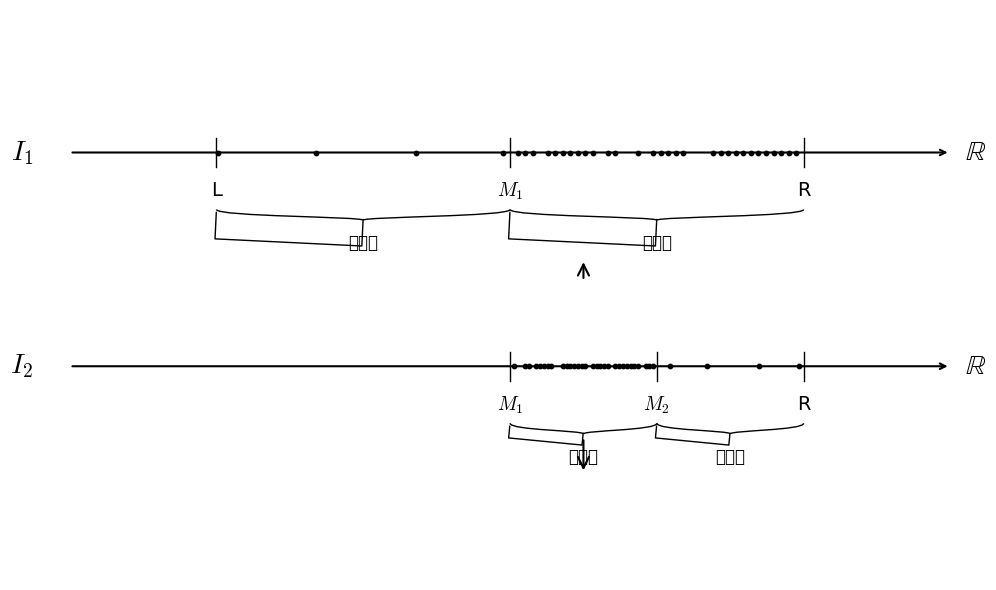

In [55]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

def draw_brace(ax, x_span, y_pos, text, text_offset=0.2, brace_scale=0.1):
    """
    波括弧（ブレース）とテキストを描画する関数
    x_span: (x_min, x_max) のタプル
    y_pos: 括弧の頂点のy座標（ここから下に向かう）
    """
    xmin, xmax = x_span
    xcenter = (xmin + xmax) / 2
    
    # 括弧の形状（ベジェ曲線的アプローチの簡易版としてannotateを使用）
    # Matplotlibには直接的な波括弧がないため、Artistを使って描画します
    
    # 左半分
    ax.annotate('', xy=(xmin, y_pos), xytext=(xcenter, y_pos - brace_scale),
                arrowprops=dict(arrowstyle='-', connectionstyle=f"bar,fraction=-0.2", color='black'))
    # 右半分 (見た目を整えるため実際には単一の角括弧スタイルで代用し、カーブはconnectionstyleで調整)
    
    # より手書きに近い波括弧を描くためにPathPatchを使用
    path_data = [
        (patches.Path.MOVETO, [xmin, y_pos]),
        (patches.Path.CURVE4, [xmin, y_pos - brace_scale]),
        (patches.Path.CURVE4, [xcenter, y_pos - brace_scale]),
        (patches.Path.LINETO, [xcenter, y_pos - brace_scale*1.5]), # 真ん中の尖り
        (patches.Path.MOVETO, [xcenter, y_pos - brace_scale*1.5]),
        (patches.Path.CURVE4, [xcenter, y_pos - brace_scale]),
        (patches.Path.CURVE4, [xmax, y_pos - brace_scale]),
        (patches.Path.LINETO, [xmax, y_pos]),
    ]
    codes, verts = zip(*path_data)
    path = patches.Path(verts, codes)
    patch = patches.PathPatch(path, facecolor='none', lw=1)
    ax.add_patch(patch)

    # テキスト
    ax.text(xcenter, y_pos - brace_scale * 1.5 - text_offset, text, 
            ha='center', va='top', fontsize=12)

def draw_number_line(ax, y, label, x_range=(-1, 11)):
    """数直線のベースを描画"""
    # 線
    ax.annotate('', xy=(x_range[1], y), xytext=(x_range[0], y),
                arrowprops=dict(arrowstyle='->', lw=1.5))
    # ラベル (I1, I2)
    ax.text(x_range[0] - 0.5, y, label, ha='right', va='center', fontsize=20)
    # R (実数全体の記号)
    ax.text(x_range[1] + 0.2, y, r'$\mathbb{R}$', ha='left', va='center', fontsize=20)

def plot_points(ax, y, x_start, x_end, density='finite'):
    """区間上に点をプロット"""
    if density == 'finite':
        # 有限個なのでランダムに数点
        cnt = 4
        points = np.linspace(x_start + 0.1, x_end - 0.1, cnt)
        # ランダム性を少し入れる
        points += np.random.uniform(-0.1, 0.1, cnt)
    else:
        # 無限個なので密に描画
        points = np.linspace(x_start, x_end, 40)
        # 一部を間引いて「点々」に見えるようにする
        points = points[np.random.choice(len(points), 30, replace=False)]
    
    ax.scatter(points, [y]*len(points), s=10, color='black', marker='o')

# --- メイン描画処理 ---
fig, ax = plt.subplots(figsize=(10, 6))

# 日本語フォント設定（環境に合わせて変更してください）
# Windows: 'MS Gothic', Mac: 'Hiragino Sans', Colab: 'Japan1' など
plt.rcParams['font.family'] = 'MS Gothic' 

# 座標設定
y1 = 4  # 上の数直線
y2 = 1  # 下の数直線
L = 1
R = 9
M1 = 5
M2 = 7 # 下の段での分割点

# === 1段目 (I1) ===
draw_number_line(ax, y1, r'$I_1$')

# 目盛り
for x, label in [(L, 'L'), (M1, '$M_1$'), (R, 'R')]:
    ax.plot([x, x], [y1 - 0.2, y1 + 0.2], color='black', lw=1)
    ax.text(x, y1 - 0.4, label, ha='center', va='top', fontsize=14)

# 点の描画 (左:有限, 右:無限)
plot_points(ax, y1, L, M1, 'finite')
plot_points(ax, y1, M1, R, 'infinite')

# 括弧とラベル
draw_brace(ax, (L, M1), y1 - 0.8, '有限個')
draw_brace(ax, (M1, R), y1 - 0.8, '無限個')


# === 矢印 (遷移) ===
# 無限個の方を選んで下へ
ax.annotate('', xy=(6, y2 + 1.5), xytext=(6, y1 - 1.8),
            arrowprops=dict(arrowstyle='->, head_width=0.4, head_length=0.8', lw=1.5, color='black'))
ax.annotate('', xy=(6, y2 - 1.5), xytext=(6, y2 - 1.0),
            arrowprops=dict(arrowstyle='->, head_width=0.4, head_length=0.8', lw=1.5, color='black'))


# === 2段目 (I2) ===
draw_number_line(ax, y2, r'$I_2$')

# 目盛り (今回は M1, M2, R)
# 画像に合わせて M1 が左端、R が右端となる区間を描画
for x, label in [(M1, '$M_1$'), (M2, '$M_2$'), (R, 'R')]:
    ax.plot([x, x], [y2 - 0.2, y2 + 0.2], color='black', lw=1)
    ax.text(x, y2 - 0.4, label, ha='center', va='top', fontsize=14)

# 点の描画 (今回は 左:無限, 右:有限 という設定)
plot_points(ax, y2, M1, M2, 'infinite')
plot_points(ax, y2, M2, R, 'finite')

# 括弧とラベル
draw_brace(ax, (M1, M2), y2 - 0.8, '無限個')
draw_brace(ax, (M2, R), y2 - 0.8, '有限個')


# --- 表示設定 ---
ax.set_xlim(-1, 11)
ax.set_ylim(-2, 6)
ax.axis('off') # 軸を消す
plt.tight_layout()
plt.show()

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


PDF file saved to: ../out/img/ch02_figure_9.pdf


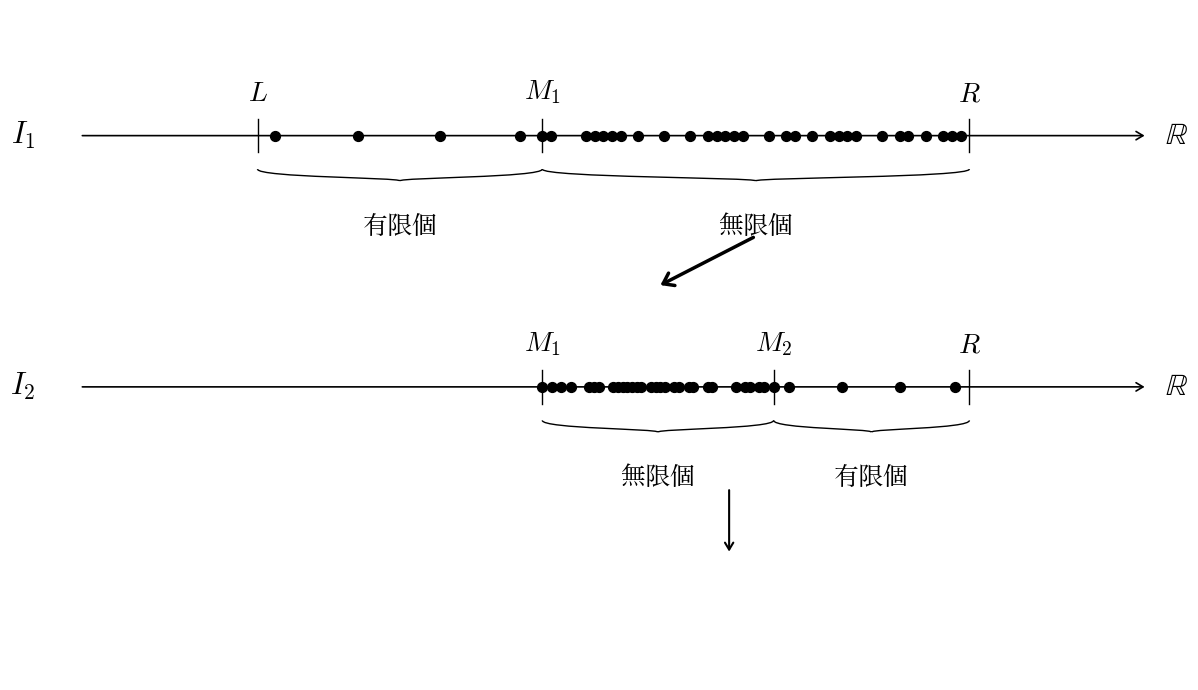

In [63]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import os

# --- フォント設定 (LaTeXスタイル) ---
# 数式部分を LaTeX 標準の Computer Modern に設定
plt.rcParams['mathtext.fontset'] = 'cm'
# 全体のフォントをセリフ体（明朝系）に設定
plt.rcParams['font.family'] = 'serif'
# 日本語フォントの優先順位設定 (環境ごとの明朝体を網羅)
plt.rcParams['font.serif'] = [
    'Hiragino Mincho ProN', 'Yu Mincho', 'MS Mincho', 
    'BIZ UDPMincho', 'TakaoPMincho', 'IPAexMincho', 'serif'
]

# --- 描画関数定義 ---
def draw_brace(ax, x_span, y_pos, text, text_offset=0.4, brace_scale=0.1):
    """波括弧とテキストを描画"""
    xmin, xmax = x_span
    xcenter = (xmin + xmax) / 2
    
    # 波括弧のパス生成
    path_data = [
        (patches.Path.MOVETO, [xmin, y_pos]),
        (patches.Path.CURVE4, [xmin, y_pos - brace_scale]),
        (patches.Path.CURVE4, [xcenter, y_pos - brace_scale]),
        (patches.Path.LINETO, [xcenter, y_pos - brace_scale*1.4]),
        (patches.Path.MOVETO, [xcenter, y_pos - brace_scale*1.4]),
        (patches.Path.CURVE4, [xcenter, y_pos - brace_scale]),
        (patches.Path.CURVE4, [xmax, y_pos - brace_scale]),
        (patches.Path.LINETO, [xmax, y_pos]),
    ]
    codes, verts = zip(*path_data)
    path = patches.Path(verts, codes)
    patch = patches.PathPatch(path, facecolor='none', edgecolor='black', lw=1.0)
    ax.add_patch(patch)
    
    # テキスト描画 (サイズ調整)
    ax.text(xcenter, y_pos - brace_scale * 1.5 - text_offset, text, 
            ha='center', va='top', fontsize=18)

def draw_number_line(ax, y, label, x_range=(-1, 11)):
    """数直線の描画"""
    # 矢印付き直線
    ax.annotate('', xy=(x_range[1], y), xytext=(x_range[0], y),
                arrowprops=dict(arrowstyle='->, head_width=0.3, head_length=0.5', lw=1.2, color='black'))
    # ラベル (数式フォント)
    ax.text(x_range[0] - 0.5, y, label, ha='right', va='center', fontsize=22)
    ax.text(x_range[1] + 0.2, y, r'$\mathbb{R}$', ha='left', va='center', fontsize=22)

def plot_points(ax, y, x_start, x_end, density='finite'):
    """点のプロット"""
    if density == 'finite':
        cnt = 4
        points = np.linspace(x_start + 0.2, x_end - 0.2, cnt)
        points += np.random.uniform(-0.05, 0.05, cnt)
    else:
        # 無限個の表現
        points = np.linspace(x_start, x_end, 50)
        points = points[np.random.choice(len(points), 30, replace=False)]
    ax.scatter(points, [y]*len(points), s=50, color='black', marker='o', zorder=5)

# --- メイン処理 ---
fig, ax = plt.subplots(figsize=(12, 7))

# 背景透明化設定
fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

# パラメータ
y1 = 4.0  # 上段の高さ
y2 = 1.0  # 下段の高さ
L, R = 1, 9
M1 = 4.2
M2 = 6.8

# === 上段 (I1) ===
draw_number_line(ax, y1, r'$I_1$')
for x, label in [(L, r'$L$'), (M1, r'$M_1$'), (R, r'$R$')]:
    ax.plot([x, x], [y1 - 0.2, y1 + 0.2], color='black', lw=1.0)
    ax.text(x, y1 + 0.35, label, ha='center', va='bottom', fontsize=20)

plot_points(ax, y1, L, M1, 'finite')
plot_points(ax, y1, M1, R, 'infinite')
draw_brace(ax, (L, M1), y1 - 0.4, '有限個')
draw_brace(ax, (M1, R), y1 - 0.4, '無限個')


# === 矢印修正 (右上から左下へ) ===
# xytext: 始点 (上段 "無限個" のテキストの下あたり)
# xy    : 終点 (下段の区間 [M1, M2] の上あたり)
arrow_start = (6.6, y1 - 1.2) # 上段の無限個のラベルの下
arrow_end   = (5.5, y2 + 1.2) # 下段の区間の上

ax.annotate('', 
            xy=arrow_end,       # 矢印の先端
            xytext=arrow_start, # 矢印のお尻
            arrowprops=dict(arrowstyle='->, head_width=0.5, head_length=0.7', lw=2.5, color='black'))


# === 下段 (I2) ===
draw_number_line(ax, y2, r'$I_2$')
for x, label in [(M1, r'$M_1$'), (M2, r'$M_2$'), (R, r'$R$')]:
    ax.plot([x, x], [y2 - 0.2, y2 + 0.2], color='black', lw=1.0)
    ax.text(x, y2 + 0.35, label, ha='center', va='bottom', fontsize=20)

plot_points(ax, y2, M1, M2, 'infinite')
plot_points(ax, y2, M2, R, 'finite')
draw_brace(ax, (M1, M2), y2 - 0.4, '無限個')
draw_brace(ax, (M2, R), y2 - 0.4, '有限個')

# さらに続く矢印 (下向き)
ax.annotate('', 
            xy=(M2 - 0.5, y2 - 2.0), 
            xytext=(M2 - 0.5, y2 - 1.2),
            arrowprops=dict(arrowstyle='->, head_width=0.3, head_length=0.5', lw=1.5, color='black'))

# --- 保存処理 ---
ax.set_xlim(-1, 11)
ax.set_ylim(-2.5, 5.5)
ax.axis('off')
plt.tight_layout()

output_dir = '../out/img/'
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, 'ch02_figure_9.pdf')

# 背景透明で保存
plt.savefig(output_path, transparent=True, facecolor='none', edgecolor='none', dpi=600)

print(f"PDF file saved to: {output_path}")
plt.show()

In [69]:
# -*- coding: utf-8 -*-
import os
import numpy as np

# =============================
# LaTeXフォント（画像みたいな字形）に寄せる設定
#  - 日本語（有限個/無限個）も同じTeXで出したいので
#    PGF + LuaLaTeX + luatexja を使う版にしています
#  - もし環境でエラーが出たら USE_TEX = False にしてください（mathtext版に自動で切替）
# =============================
USE_TEX = True

import matplotlib as mpl

if USE_TEX:
    # PGFバックエンドを使う（LuaLaTeXで日本語も綺麗に）
    mpl.use("pgf")
    mpl.rcParams.update({
        "text.usetex": True,
        "pgf.texsystem": "lualatex",
        "font.family": "serif",
        # LaTeX側の前処理：数学 + 日本語
        "pgf.preamble": r"""
\usepackage{amsmath,amssymb}
\usepackage{luatexja}
\usepackage{luatexja-fontspec}

% TeX Liveに入っていることが多い和文フォント（なければ別フォント名に変更）
\setmainjfont{HaranoAjiMincho}
\setsansjfont{HaranoAjiGothic}
""",
    })
else:
    # mathtext（TeX不要）でそれっぽくする版
    mpl.rcParams["mathtext.fontset"] = "cm"
    mpl.rcParams["font.family"] = "serif"
    mpl.rcParams["font.serif"] = [
        "Hiragino Mincho ProN", "Yu Mincho", "MS Mincho",
        "BIZ UDPMincho", "TakaoPMincho", "IPAexMincho", "serif"
    ]

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.path import Path

# 乱数固定（毎回同じ点配置にしたい場合）
np.random.seed(0)

def as_math(s: str) -> str:
    """必ず数式モード($...$)にする（既に$...$ならそのまま）。"""
    s = s.strip()
    return s if (s.startswith("$") and s.endswith("$")) else f"${s}$"

def draw_brace(ax, x_span, y_pos, text, text_offset=0.4, brace_scale=0.1):
    """波括弧（簡易）とテキストを描画"""
    xmin, xmax = x_span
    xcenter = (xmin + xmax) / 2.0

    path_data = [
        (Path.MOVETO, (xmin, y_pos)),
        (Path.CURVE4, (xmin, y_pos - brace_scale)),
        (Path.CURVE4, (xcenter, y_pos - brace_scale)),
        (Path.LINETO, (xcenter, y_pos - brace_scale * 1.4)),
        (Path.MOVETO, (xcenter, y_pos - brace_scale * 1.4)),
        (Path.CURVE4, (xcenter, y_pos - brace_scale)),
        (Path.CURVE4, (xmax, y_pos - brace_scale)),
        (Path.LINETO, (xmax, y_pos)),
    ]
    codes = [c for c, _ in path_data]
    verts = [v for _, v in path_data]
    brace_path = Path(verts, codes)

    patch = patches.PathPatch(brace_path, facecolor="none", edgecolor="black", lw=1.0)
    ax.add_patch(patch)

    # ここは日本語（有限個/無限個）なので $...$ にしない
    ax.text(
        xcenter,
        y_pos - brace_scale * 1.5 - text_offset,
        text,
        ha="center",
        va="top",
        fontsize=18
    )

def draw_number_line(ax, y, label, x_range=(-1, 11)):
    """数直線の描画（I1, RなどはLaTeX数式で）"""
    ax.annotate(
        "",
        xy=(x_range[1], y),
        xytext=(x_range[0], y),
        arrowprops=dict(
            arrowstyle="->, head_width=0.3, head_length=0.5",
            lw=1.2,
            color="black"
        )
    )

    ax.text(
        x_range[0] - 0.5,
        y,
        as_math(label),
        ha="right",
        va="center",
        fontsize=22
    )
    ax.text(
        x_range[1] + 0.2,
        y,
        as_math(r"\mathbb{R}"),
        ha="left",
        va="center",
        fontsize=22
    )

def plot_points(ax, y, x_start, x_end, density="finite"):
    """点のプロット（有限個/無限個の雰囲気）"""
    if density == "finite":
        cnt = 4
        points = np.linspace(x_start + 0.2, x_end - 0.2, cnt)
        points += np.random.uniform(-0.05, 0.05, cnt)
    else:
        points = np.linspace(x_start, x_end, 50)
        points = points[np.random.choice(len(points), 30, replace=False)]

    ax.scatter(points, [y] * len(points), s=50, color="black", marker="o", zorder=5)

def main():
    fig, ax = plt.subplots(figsize=(12, 7))

    # 背景透明（白でいいならこの2行は消してOK）
    fig.patch.set_alpha(0)
    ax.patch.set_alpha(0)

    # パラメータ
    y1 = 4.0  # 上段
    y2 = 1.0  # 下段
    L, R = 1.0, 9.0
    M1 = 4.2
    M2 = 6.8

    # =============================
    # 上段 (I_1)
    # =============================
    draw_number_line(ax, y1, r"I_1")

    for x, lab in [(L, r"L"), (M1, r"M_1"), (R, r"R")]:
        ax.plot([x, x], [y1 - 0.2, y1 + 0.2], color="black", lw=1.0)
        ax.text(x, y1 + 0.35, as_math(lab), ha="center", va="bottom", fontsize=20)

    plot_points(ax, y1, L, M1, "finite")
    plot_points(ax, y1, M1, R, "infinite")
    draw_brace(ax, (L, M1), y1 - 0.4, "有限個")
    draw_brace(ax, (M1, R), y1 - 0.4, "無限個")

    # =============================
    # 斜め矢印（垂直寄り）
    # x差を小さくすると縦に近づく（arrow_dx = 0 で完全縦）
    # =============================
    arrow_x = 6.05
    arrow_dx = -0.08

    arrow_start = (arrow_x, y1 - 1.6)
    arrow_end   = (arrow_x + arrow_dx, y2 + 0.8)

    ax.annotate(
        "",
        xy=arrow_end,
        xytext=arrow_start,
        arrowprops=dict(
            arrowstyle="->, head_width=0.5, head_length=0.7",
            lw=2.5,
            color="black"
        )
    )

    # =============================
    # 下段 (I_2)
    # =============================
    draw_number_line(ax, y2, r"I_2")

    for x, lab in [(M1, r"M_1"), (M2, r"M_2"), (R, r"R")]:
        ax.plot([x, x], [y2 - 0.2, y2 + 0.2], color="black", lw=1.0)
        ax.text(x, y2 + 0.35, as_math(lab), ha="center", va="bottom", fontsize=20)

    plot_points(ax, y2, M1, M2, "infinite")
    plot_points(ax, y2, M2, R, "finite")
    draw_brace(ax, (M1, M2), y2 - 0.4, "無限個")
    draw_brace(ax, (M2, R), y2 - 0.4, "有限個")

    # さらに続く矢印（下向き）
    ax.annotate(
        "",
        xy=(M2 - 0.5, y2 - 2.0),
        xytext=(M2 - 0.5, y2 - 1.2),
        arrowprops=dict(
            arrowstyle="->, head_width=0.3, head_length=0.5",
            lw=1.5,
            color="black"
        )
    )

    # =============================
    # 仕上げ & 保存
    # =============================
    ax.set_xlim(-1, 11)
    ax.set_ylim(-2.5, 5.5)
    ax.axis("off")
    plt.tight_layout()

    output_dir = "../out/img/"
    os.makedirs(output_dir, exist_ok=True)
    output_path = os.path.join(output_dir, "ch02_figure_9.pdf")

    plt.savefig(
        output_path,
        transparent=True,
        facecolor="none",
        edgecolor="none",
        dpi=600
    )

    print(f"PDF file saved to: {output_path}")
    plt.show()

if __name__ == "__main__":
    main()

PDF file saved to: ../out/img/ch02_figure_9.pdf


/var/folders/w5/hsn29ys17m19gn2zjcgxmxh40000gn/T/ipykernel_17567/4203909457.py:224: UserWarning: FigureCanvasPgf is non-interactive, and thus cannot be shown
  plt.show()
